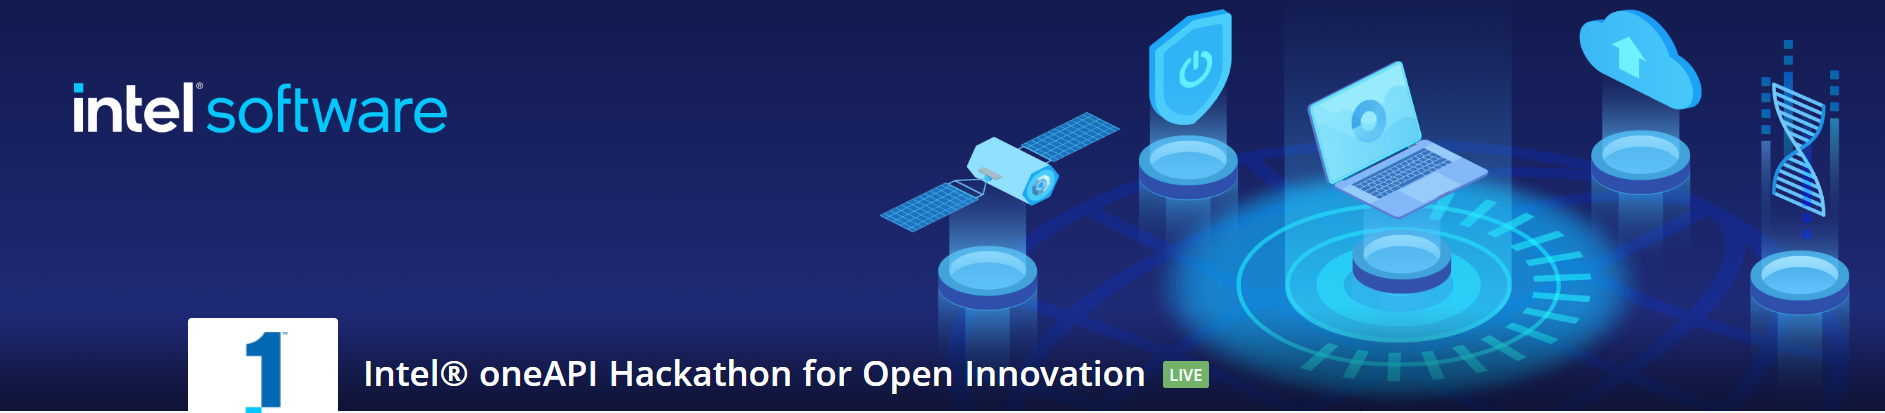

<h2><font color='green'> Machine Learning Challenge Track: Predict the quality of freshwater </font></h2>

**Problem:**

Freshwater is one of our most vital and scarce natural resources, making up just 3% of the earth’s total water volume. It touches nearly every aspect of our daily lives, from drinking, swimming, and bathing to generating food, electricity, and the products we use every day. Access to a safe and sanitary water supply is essential not only to human life, but also to the survival of surrounding ecosystems that are experiencing the effects of droughts, pollution, and rising temperatures.

**Expected Solution:**

In this track of the hackathon, you will have the opportunity to apply the oneAPI skills to help global water security and environmental sustainability efforts by predicting whether freshwater is safe to drink and use for the ecosystems that rely on it.

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> We leveraged the following Intel® AI Analytics Toolkit (AI Kit) - OneAPI Libraries for this model development </font></h3>

<ol>
    <li><b>Intel® Distribution for Python*</b></li>
    <li><b>Intel® Extension for Scikit-learn*</b></li>
    <li><b>Intel optimizations for XGBoost </b></li>
    <li><b>Intel® Distribution of Modin*</b></li>
</ol>
<hr>
<b><font color='red'>This has greatly reduced the time of our overall processing compared to standard libraries </font></b>

In [1]:
from sklearnex import patch_sklearn
#running this intel patch so all the sklearn libraries imported will have intel extension for faster processing
patch_sklearn()
import xgboost

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Importing all the required Python libraries (Intel API and others)</font></h3>

In [2]:
#Leveraging the Modin Distribution for Pandas Loading
import pandas as pd

import numpy as np
import time
from numpy import mean
from numpy import std
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

#Leveraging the Intel API SKLearn Extension
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

C:\Users\ashutoshvmadmin\AppData\Local\Temp\2\ipykernel_6880\315676513.py:10: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [3]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Loading the Dataset </font></h3>

In [4]:
#Reading the Provided Dataset
data = pd.read_csv('dataset.csv', index_col = 0)

In [5]:
#Having a Preview
data.head(5)


,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
Index,,,,,,,,,,,,,,,,,,,,,
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,0.144599,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,0.437835,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,0.431588,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,0.239451,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,0.616574,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Data Cleansing </font></h3>

In [6]:
data.describe()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
count,5.840788e+06,5.917089e+06,5.851117e+06,5.781311e+06,5.929933e+06,5.800716e+06,5.907027e+06,5.767686e+06,5.757440e+06,5.777951e+06,5.759424e+06,5.792981e+06,5.899017e+06,5.847259e+06,5.955172e+06,5.788609e+06,5.927114e+06,5.857239e+06,5.842323e+06,5.956842e+06
mean,7.445373e+00,1.279027e-01,6.169970e+00,1.842970e+02,1.498336e-03,1.550255e+00,5.215093e-01,9.644315e-01,5.161216e-01,1.803459e+00,1.460764e+02,4.249974e+02,3.255738e+00,1.092802e-01,2.671454e+02,1.912982e+01,6.000324e+01,1.573227e+01,1.150404e+01,3.030552e-01
std,8.881665e-01,4.799915e-01,3.256667e+00,6.842828e+01,3.250641e-02,1.546368e+00,9.258807e-01,8.247870e-01,5.965534e-01,1.069586e+00,6.879844e+01,1.899937e+02,7.328441e-01,4.761827e-01,1.558586e+02,1.136623e+01,1.809977e+01,8.794391e+00,6.922858e+00,4.595789e-01
min,1.057113e+00,2.047587e-53,2.861727e-01,2.363919e+01,0.000000e+00,1.482707e-08,1.029712e-16,4.550148e-06,2.982735e-10,1.100007e-02,1.194073e+01,1.059998e+01,9.019921e-01,4.793505e-55,1.048902e-02,6.661938e-01,-3.387091e+01,1.000000e+00,0.000000e+00,0.000000e+00
25%,6.894328e+00,9.992949e-06,3.973078e+00,1.381341e+02,1.500283e-122,4.148202e-01,3.872368e-02,3.749503e-01,1.288629e-01,8.921019e-01,9.777114e+01,2.864261e+02,2.744504e+00,2.522376e-06,1.329157e+02,1.134879e+01,4.779120e+01,8.000000e+00,6.000000e+00,0.000000e+00
50%,7.449564e+00,2.249640e-03,5.604051e+00,1.760178e+02,2.213625e-62,1.081818e+00,2.097680e-01,7.751792e-01,3.479592e-01,1.774284e+00,1.346489e+02,3.970808e+02,3.209748e+00,6.481943e-04,2.658880e+02,1.644428e+01,5.999681e+01,1.600000e+01,1.200000e+01,0.000000e+00
75%,8.014424e+00,5.455290e-02,7.672402e+00,2.179811e+02,3.592165e-27,2.230841e+00,6.249132e-01,1.341508e+00,7.010104e-01,2.654286e+00,1.817703e+02,5.333489e+02,3.705217e+00,1.672082e-02,3.984954e+02,2.383543e+01,7.221235e+01,2.300000e+01,1.800000e+01,1.000000e+00
max,1.291072e+01,1.935315e+01,9.639078e+01,1.507310e+03,5.844281e+00,2.836867e+01,2.371527e+01,1.464625e+01,1.207482e+01,4.141998e+00,1.434587e+03,2.271632e+03,1.256663e+01,2.374086e+01,5.797999e+02,2.973086e+02,1.521237e+02,3.100000e+01,2.300000e+01,1.000000e+00


In [7]:
data.isna().sum()

pH                        116054
Iron                       39753
Nitrate                   105725
Chloride                  175531
Lead                       26909
Zinc                      156126
Color                       5739
Turbidity                  49815
Fluoride                  189156
Copper                    199402
Odor                      178891
Sulfate                   197418
Conductivity              163861
Chlorine                   57825
Manganese                 109583
Total Dissolved Solids      1670
Source                     88262
Water Temperature         168233
Air Temperature            29728
Month                      95668
Day                        99603
Time of Day               114519
Target                         0
dtype: int64

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Filling all the Null Values Using Backward Fill Method </font></h3>



In [8]:
data.fillna(method='bfill', inplace=True)


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Converting all the Columns of String Data Type to Integer Type Using Factorization Method </font></h3>

<i>- We are converting all the categorical columns into numerical data type so we can use it for training our model. Since machine learning model only accepts numerical values.</i>
<img src="Images\ExplainStringToInteger.png" alt="Alternative text" />



In [9]:

#Exclude Object Columns and Factorize all the Number Columns

df_numeric = data.select_dtypes(exclude=['object'])
df_obj = data.select_dtypes(include=['object']).copy()
    
for c in df_obj:
    df_obj[c] = pd.factorize(df_obj[c])[0]

data = pd.concat([df_obj,df_numeric], axis=1)

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Correlation Matrix </font></h3>


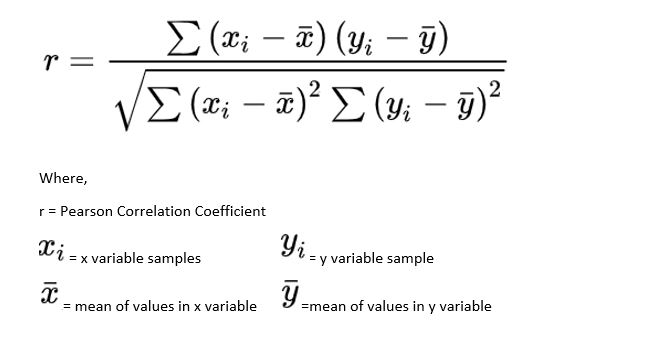

In [10]:
data.corr(method='pearson').style.format("{:.3}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Color,Source,Month,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Water Temperature,Air Temperature,Day,Time of Day,Target
Color,1.0,0.000352,-0.000439,-0.00793,0.0423,0.0418,0.0514,0.00997,0.0205,0.0564,0.0422,0.0535,0.0406,0.0316,-0.000123,0.0369,0.0466,0.0233,-0.000989,-0.000545,0.000661,3.48e-05,0.147
Source,0.000352,1.0,-7.11e-05,0.000667,0.000206,0.000431,0.000445,0.000496,4.11e-05,-0.000204,0.000251,0.000323,-2.73e-05,-0.000287,0.000156,0.000691,-2.79e-05,0.000445,-0.000194,0.000354,0.000204,0.000296,-7.86e-05
Month,-0.000439,-7.11e-05,1.0,-0.000294,-0.000135,0.000239,4.57e-05,0.00026,-6.28e-05,-0.000205,-4.39e-05,0.000334,0.000344,-0.00017,0.00049,0.000867,-0.000431,-0.000121,0.000414,0.000415,-0.00589,0.000414,-4.13e-05
pH,-0.00793,0.000667,-0.000294,1.0,-0.00975,-0.0095,-0.0124,-0.00233,-0.00509,-0.0134,-0.00988,-0.0132,-0.00951,-0.00729,0.000344,-0.00777,-0.0113,-0.00521,-0.000412,0.000514,0.000757,-0.000168,-0.0349
Iron,0.0423,0.000206,-0.000135,-0.00975,1.0,0.0516,0.0637,0.011,0.0253,0.0693,0.0521,0.0672,0.0497,0.0403,0.000163,0.0451,0.0588,0.0284,0.00107,-0.000331,-0.000184,0.000559,0.181
Nitrate,0.0418,0.000431,0.000239,-0.0095,0.0516,1.0,0.0636,0.0116,0.0249,0.0702,0.0519,0.0663,0.0495,0.0392,0.000122,0.045,0.0582,0.0291,-6.02e-05,0.000169,-0.000256,1.21e-06,0.183
Chloride,0.0514,0.000445,4.57e-05,-0.0124,0.0637,0.0636,1.0,0.014,0.0303,0.0857,0.0637,0.081,0.0612,0.0478,-0.000525,0.0549,0.0701,0.0361,-0.000323,-0.000315,1.08e-05,-0.000218,0.223
Lead,0.00997,0.000496,0.00026,-0.00233,0.011,0.0116,0.014,1.0,0.00588,0.0164,0.013,0.0155,0.0113,0.00905,-0.000193,0.0108,0.0133,0.00588,-6.53e-06,-0.000547,0.000128,0.000697,0.0421
Zinc,0.0205,4.11e-05,-6.28e-05,-0.00509,0.0253,0.0249,0.0303,0.00588,1.0,0.0338,0.0243,0.0321,0.0243,0.0191,-0.000137,0.0217,0.0273,0.0137,-0.00018,8.14e-05,6.58e-05,0.000753,0.0886
Turbidity,0.0564,-0.000204,-0.000205,-0.0134,0.0693,0.0702,0.0857,0.0164,0.0338,1.0,0.0693,0.0886,0.0663,0.0525,-7.58e-05,0.0619,0.0764,0.039,0.000297,-0.000861,-0.000331,-0.00102,0.244


In [11]:
#run the correlation on the data
df_correlation = data.corr()

<AxesSubplot:>

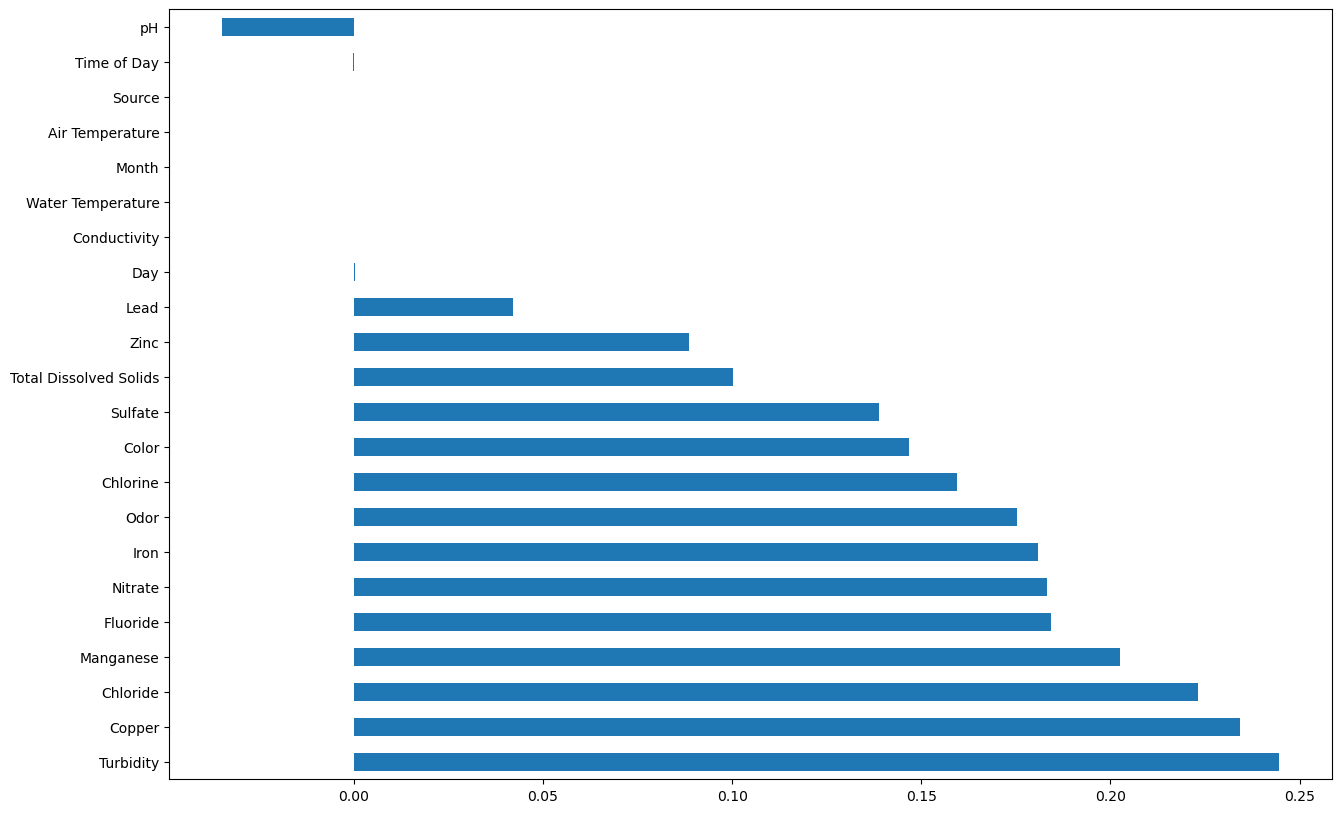

In [12]:
#visualize the highly and least correlated columns..

plt.rcParams['figure.figsize'] = [15, 10]
(df_correlation
     .Target
     .drop('Target') 
     .sort_values(ascending=False)
     .plot
     .barh())

In [13]:
#check on the correlated columns
data.corr()['Target'].sort_values()

pH                       -0.034884
Time of Day              -0.000116
Source                   -0.000079
Air Temperature          -0.000059
Month                    -0.000041
Water Temperature        -0.000004
Conductivity              0.000004
Day                       0.000253
Lead                      0.042072
Zinc                      0.088646
Total Dissolved Solids    0.100203
Sulfate                   0.138885
Color                     0.146784
Chlorine                  0.159396
Odor                      0.175274
Iron                      0.180904
Nitrate                   0.183262
Fluoride                  0.184222
Manganese                 0.202650
Chloride                  0.223143
Copper                    0.234330
Turbidity                 0.244500
Target                    1.000000
Name: Target, dtype: float64

In [14]:
cor = data.corr()['Target'].sort_values()

In [15]:
df = data.copy()

<h3><font color='blue'> Removing all the Columns from the Dataset whose Correlation Value is Less than 0.01 with the Target Column </font></h3>
<i>- Since columns with such low correlation with not be useful for predicting the target column. So we will be dropping through column while training the predictive model</i>

In [16]:
#Excluding Columns for Faster Processing and improving Accuracy
arr = []
for k, v in cor.items():
    if abs(v) < 0.01:
        arr.append(k)
        
df = df.drop(arr, axis=1)

#preview after dripping the non-correlated columns

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> BoxPlot ( Pictorial View of all the Outliers in the Data ) </font></h3>

<AxesSubplot:>

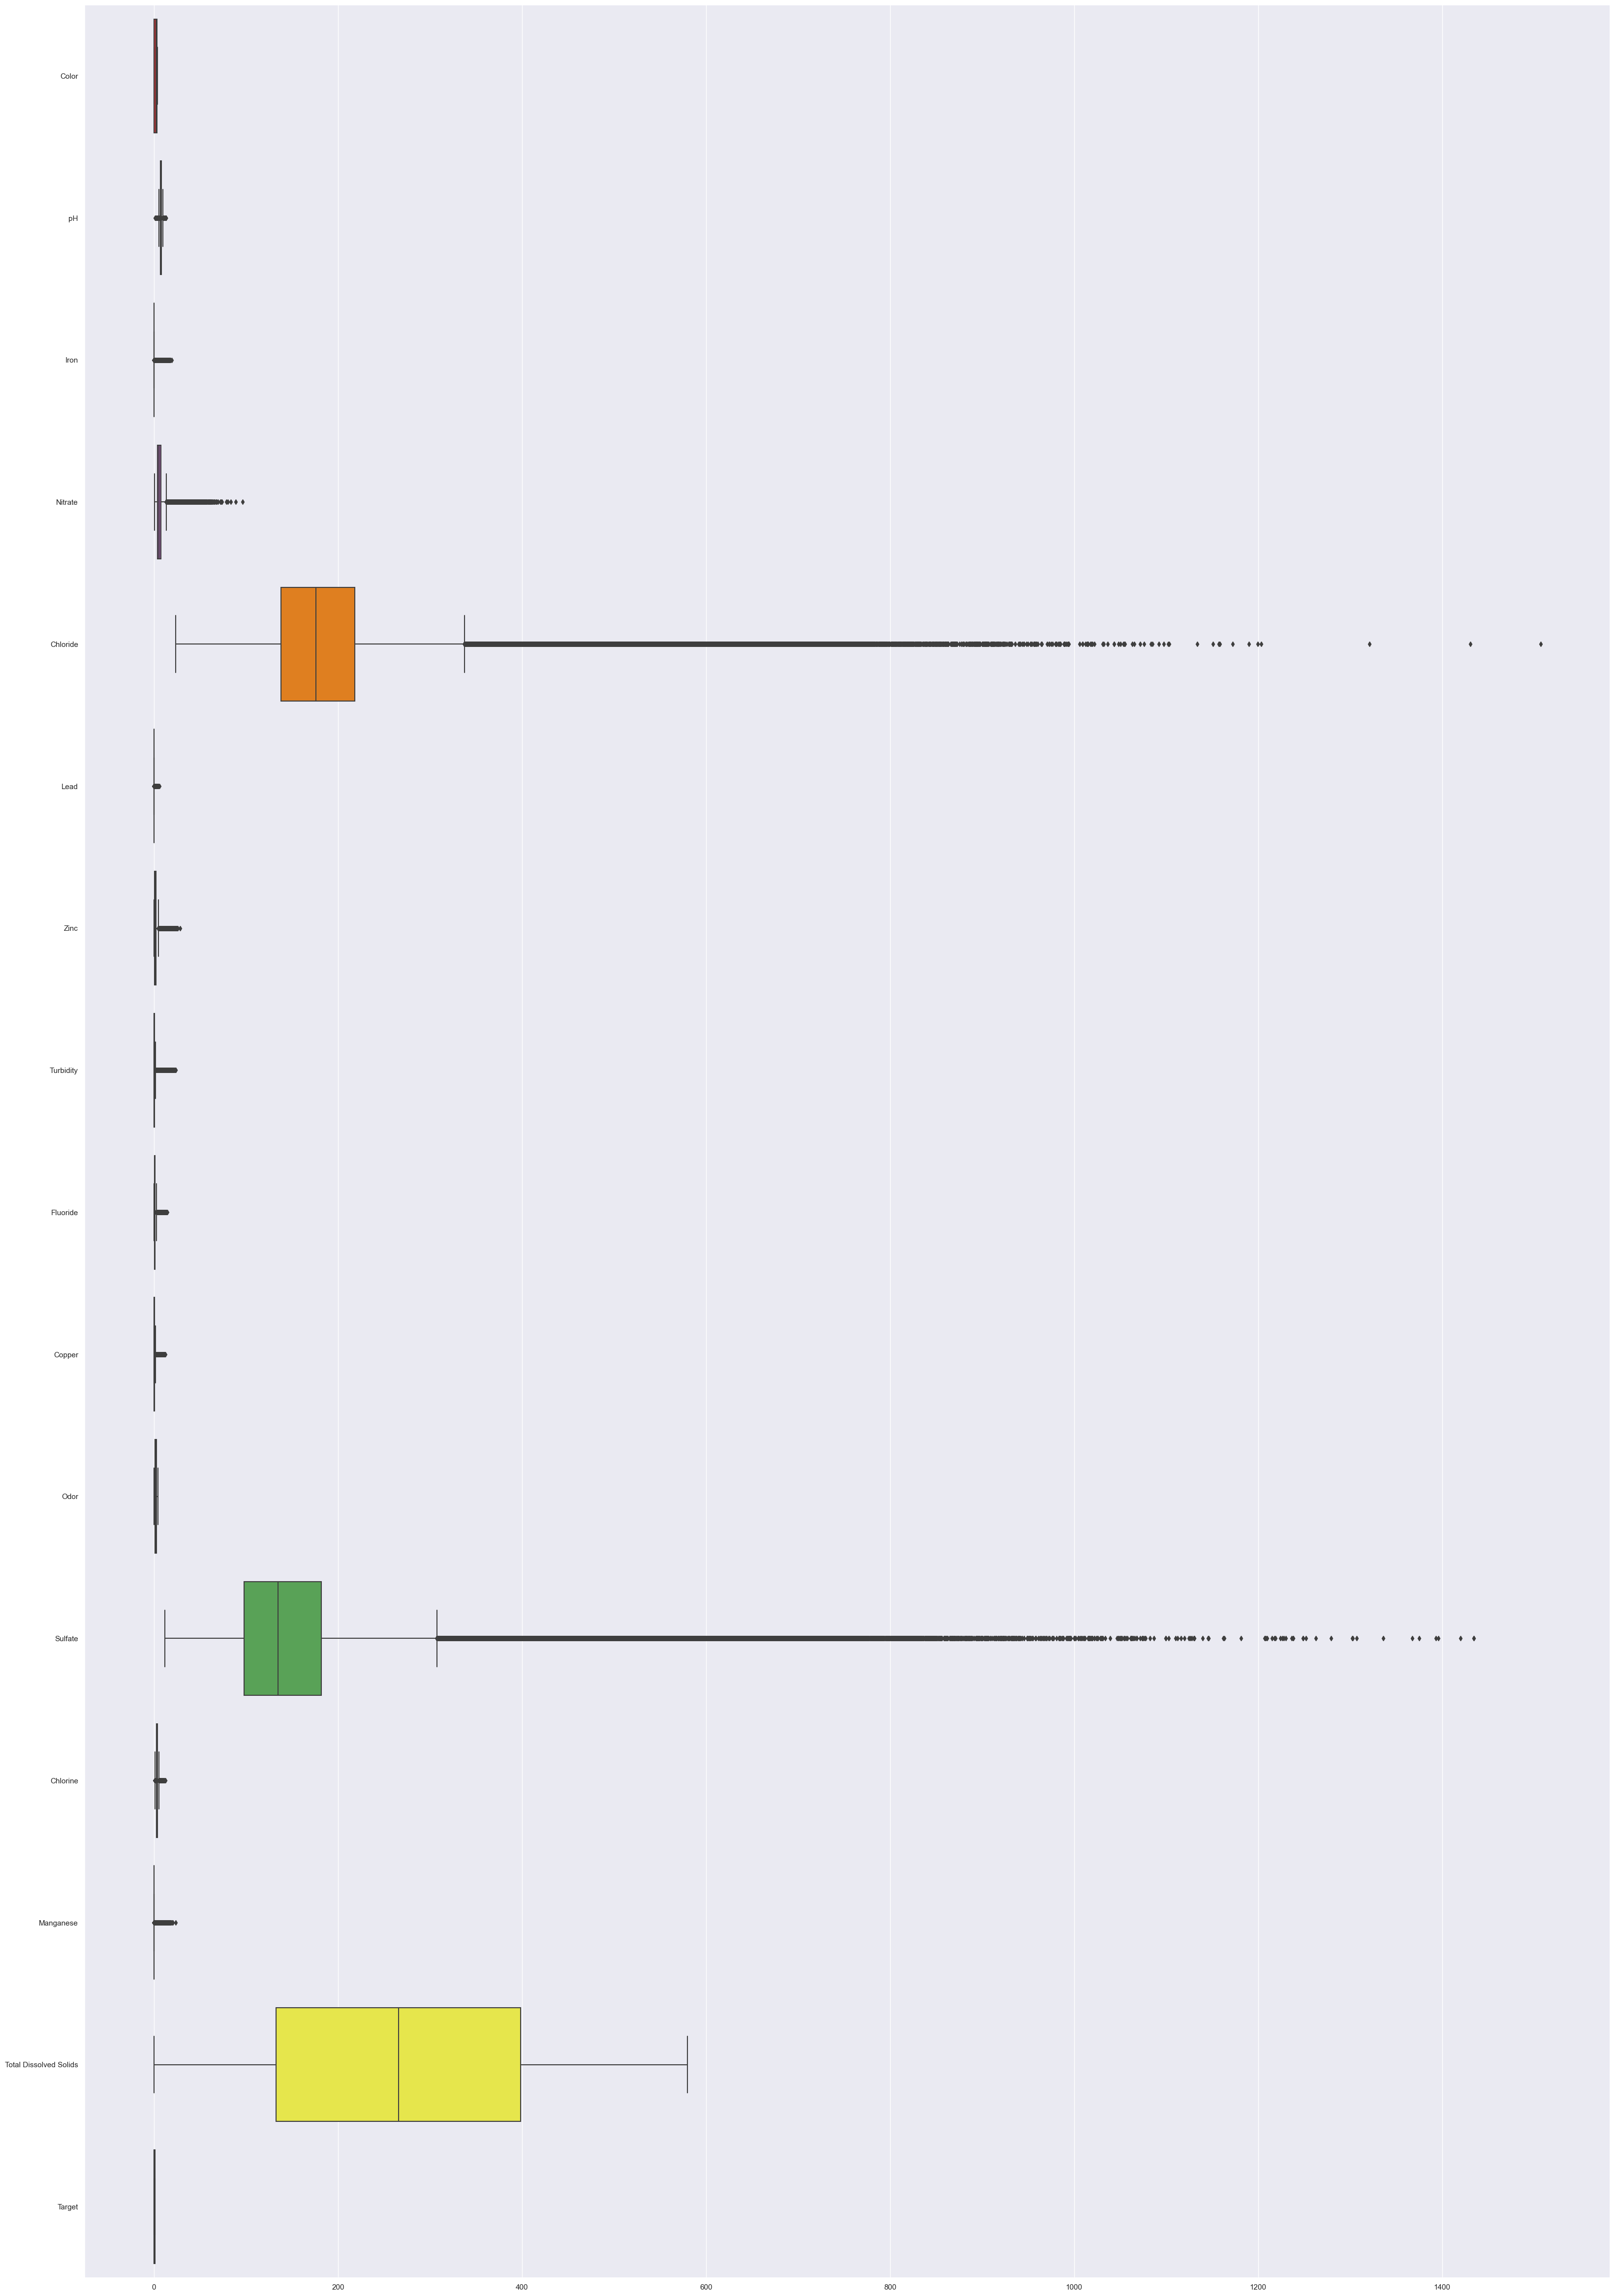

In [17]:
#visualize the Outliers of which columns are impacting the quality of data..
sns.set(rc={'figure.figsize':(40,60)})
sns.boxplot(data=df, orient="h", palette="Set1")

<h3><font color='blue'> Removing all the Outliers from the Dataset </font></h3>

<i>- Since outliers can skew the results of the predictive model. It is better to remove those from the dataset.</i>
<i>- Since there is such high standard deviation in the dataset i.e. the values are spread over wider range. So instead of filling null values by mean of a column we are using forward fill method.</i>

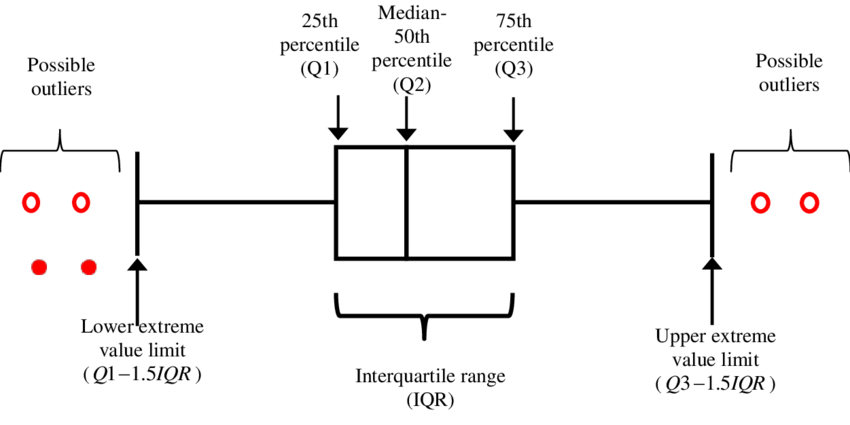

In [18]:
#Create the Data Set within the required Quartile.. 
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [19]:
#Check if the datasize is sufficient after removing the quartiles
((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

Color                           0
pH                         157747
Iron                       955720
Nitrate                    196843
Chloride                   194005
Lead                      1468586
Zinc                       184192
Turbidity                  464318
Fluoride                   207305
Copper                     318595
Odor                            0
Sulfate                    151367
Chlorine                   101531
Manganese                  954480
Total Dissolved Solids          0
Target                          0
dtype: int64

In [20]:

#refine the dataset by removing outliers..
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(2698438, 16)

In [21]:
#have a look at the refined data
df.head(5)

,Color,pH,Iron,Nitrate,Chloride,Lead,Zinc,Turbidity,Fluoride,Copper,Odor,Sulfate,Chlorine,Manganese,Total Dissolved Solids,Target
Index,,,,,,,,,,,,,,,,
0,0,8.332988,8.347252e-05,8.605777,122.799772,3.713298e-52,3.434827,0.022683,0.607283,0.144599,1.626212,87.266538,3.708178,2.269945e-15,332.118789,0
1,1,6.917863,8.053827e-05,3.734167,227.029851,7.849262e-94,1.245317,0.019007,0.622874,0.437835,1.686049,144.010981,3.292038,8.024076e-07,284.641984,0
4,2,8.091909,2.167128e-03,9.925788,186.540872,4.171069e-132,3.807511,0.004867,0.222912,0.616574,0.795310,175.275175,3.177849,3.296139e-03,168.075545,0
6,2,8.132455,5.526229e-02,4.288010,94.993978,2.919909e-52,1.770221,0.021703,1.111893,0.247116,0.426404,114.551427,1.706755,3.083768e-02,266.079565,0
7,0,7.258203,6.107130e-09,9.261676,182.242341,4.399852e-224,0.416478,0.047803,1.016196,0.298093,3.144199,114.551427,2.325094,6.020680e-16,214.553104,0


In [22]:
# Now make the X and Y axis of the data ..
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> Standardizing all The Columns which will be used for Training the Model </font></h3>

<i>- Strandardizing the columns so some of the machine learning model which assign weights to each column while training should not provide higher weight to a column just based on the magnitude of their value.</i>

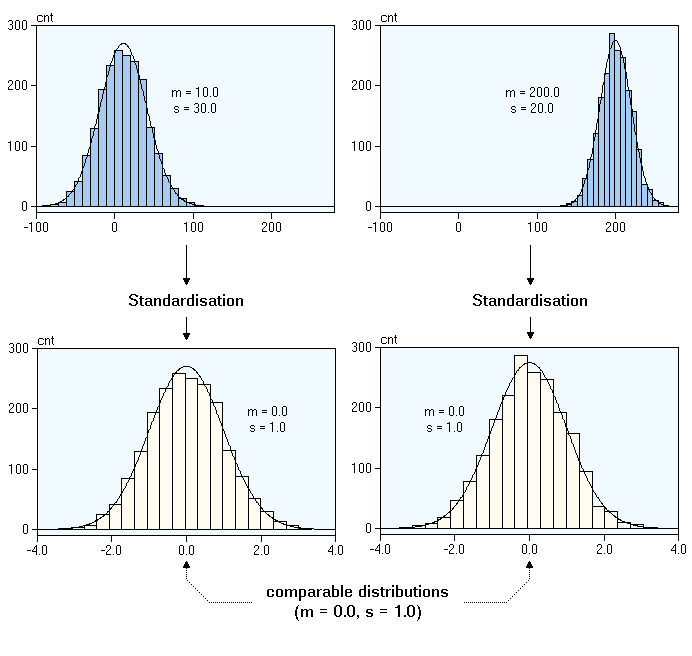

In [23]:
#use a standard scaler and fit the transformed data 
sc_X = StandardScaler()
x = sc_X.fit_transform(x)

In [24]:
#Taking a 20% for testing and rest for training the data..
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

<h2> Running the Training on FIVE models </h2>
<ol>
    <li><b> Logistic Regression </b></li>
    <li><b> XGBoost (Powered by Intel API) </b> </li>
    <li><b> Light GBM</b> </li>
    <li><b> CatBoost </b> </li>
    <li><b> Random Forest</b> </li>
    
 </ol>
<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> 1. Training and Predicting with Logistic Regression </font></h3>

In [25]:
regressor = LogisticRegression()
regressor.fit(x_train, y_train)

LogisticRegression()

In [26]:
pred = regressor.predict(x_test)

In [27]:
accuracy = regressor.score(x_test, y_test)
print(f'Accuracy of Logistic Regression Model is {round(accuracy * 100, 2)} %')

Accuracy of Logistic Regression Model is 90.5 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'>2. Training and Predicting with  XG Boost </font></h3>

In [28]:
model = XGBClassifier()

In [29]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [30]:
pred = model.predict(x_test)

In [31]:
accuracy_xgb = model.score(x_test, y_test)
print(f'Accuracy of XG Boost Model is {round(accuracy_xgb * 100, 4)} %')

Accuracy of XG Boost Model is 94.7723 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'>3. Training and Predicting with  Light GBM </font></h3>

In [32]:
model_lgbm = LGBMClassifier()

In [33]:
model_lgbm.fit(x_train, y_train)

LGBMClassifier()

In [34]:
pred_new = model_lgbm.predict(x_test)

In [35]:
accuracy_lgbm = model_lgbm.score(x_test, y_test)
print(f'Accuracy of Light Gradient Boost Model is {round(accuracy_lgbm * 100, 4)} %')

Accuracy of Light Gradient Boost Model is 95.0297 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'>4. Training and Predicting with  CAT Boost </font></h3>

In [36]:
model_cat = CatBoostClassifier(verbose=0, n_estimators=100)

In [37]:
model_cat.fit(x_train, y_train)

In [38]:
predictions = model_cat.predict(x_test)

In [39]:
accuracy_cbm = model_cat.score(x_test, y_test)
print(f'Accuracy of Light Gradient Boost Model is {round(accuracy_cbm * 100, 4)} %')

Accuracy of Light Gradient Boost Model is 94.8533 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'>5. Training and Predicting with  Random Forest </font></h3>

In [40]:
model_rfc = RandomForestClassifier()
start_time = time.time()
model_rfc.fit(x_train, y_train)
predictions = model_rfc.predict(x_test)
accuracy_rfc = model_rfc.score(x_test, y_test)
print(f'Accuracy of RandomForest Classifier Model is {round(accuracy_rfc * 100, 2)} %')
end_time = time.time()
training_time = end_time - start_time

Accuracy of RandomForest Classifier Model is 95.23 %


<hr style = "border-top: 3px solid black" >
<h3><font color='blue'> We noticed Random Forest Classifier is giving the best accuracy amongst all the models </font></h3>

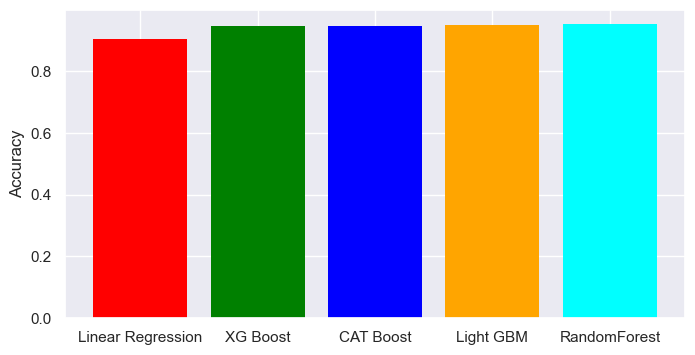

In [41]:
x = ['Linear Regression', 'XG Boost', 'CAT Boost', 'Light GBM', 'RandomForest']
y = [accuracy, accuracy_xgb, accuracy_cbm, accuracy_lgbm, accuracy_rfc]
colors = ['red', 'green', 'blue', 'orange', 'cyan']
plt.rcParams['figure.figsize'] = [8,4]
plt.bar(x, y, color=colors, edgecolor='none')
plt.ylabel('Accuracy') 
plt.show()




<hr style = "border-top: 3px solid black" >
<h3><font color='blue'>  We are able to achieve 95.23 % Accuracy in this problem statement  </font></h3>

<i>- Using sklearn intel api we were able to train our Random Forest Classifier faster than usual </i>

In [42]:
print(f'Accuracy of the Model is {round(accuracy_rfc * 100, 2)} %')
print(f"Training time: {training_time:.3f} seconds")

Accuracy of the Model is 95.23 %
Training time: 62.123 seconds
